## Modeling

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1)

In [51]:
#import the updated train & test features

train = pd.read_csv('Data/PostFeatureEng_train_1.csv')
test = pd.read_csv('Data/PostFeatureEng_test_1.csv')

In [52]:
#check
print(train.shape)
train.head()

(1454, 152)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Regular_LotShape,Gtl_LandSlope,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,MSZoning_C (all),MSZoning_FV,MSZoning_RH_RM,MSZoning_RL,Regular_LotShape_IR,Regular_LotShape_Reg,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,CentralAir_N,CentralAir_Y,PavedDrive_N/P,PavedDrive_Y,Gtl_LandSlope_Gtl,Gtl_LandSlope_NotGtl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,EffHouseAge,TotalBaths,TotalSF,HasFireplace,Has2ndFlr
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694,Reg,Gtl,4,4,4,5,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3.5,2566,0,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011,Reg,Gtl,3,3,4,5,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31,2.5,2524,1,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167,IR,Gtl,4,4,4,5,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3.5,2706,1,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398,IR,Gtl,3,4,3,4,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

To prepare our data for modeling, we will -
1. Seperate the relevant features and the target variable (`SalePrice`) from the dataset. 
2. Divide the data into train & holdout set using the **train_test_split** function. This allows us to evaluate the model performance on data it has never seen before. Doing this on the *test* dataset could result in [overfitting](https://en.wikipedia.org/wiki/Overfitting).
3. Scale the variables.
4. Perform modeling - I will try Linear, Ridge & Lasso Regressions.

Step 1. Divide into features(X) & target variable(y)

In [53]:
y = train['SalePrice'].copy()
y[:5]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [57]:
X = train.drop(columns=['Id', 'SalePrice'])
X.shape

(1454, 150)

In [59]:
#all features that we are going to use have been converted to numeric columns.
features = X.select_dtypes(include='number').columns
display(features.values)

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'ExterQual_enc', 'KitchenQual_enc',
       'BsmtQual_enc', 'HeatingQC_enc', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH_RM', 'MSZoning_RL', 'Regular_LotShape_IR',
       'Regular_LotShape_Reg', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'GarageFinish_Fin',
       'GarageFinish_None', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'CentralAir_N', 'CentralAir_Y', 'PavedDrive_N/P'

In [62]:
imp_features = features.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
                  'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 
                  'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                   'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                   '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'MasVnrArea'])
                   

In [63]:
imp_features

Index(['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'ExterQual_enc', 'KitchenQual_enc', 'BsmtQual_enc',
       'HeatingQC_enc', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH_RM',
       'MSZoning_RL', 'Regular_LotShape_IR', 'Regular_LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'GarageFinish_Fin', 'GarageFinish_None',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'CentralAir_N', 'CentralAir_Y',
       'PavedDrive_N/P', 'PavedDrive_Y', 'Gtl_LandSlope_Gtl',
       'Gtl_LandSlope_NotGtl', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'N

In [232]:
X = train[features]
display(X.shape)
X.head()

(1454, 105)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,MSZoning_C (all),MSZoning_FV,MSZoning_RH_RM,MSZoning_RL,Regular_LotShape_IR,Regular_LotShape_Reg,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,CentralAir_N,CentralAir_Y,PavedDrive_N/P,PavedDrive_Y,Gtl_LandSlope_Gtl,Gtl_LandSlope_NotGtl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,EffHouseAge,TotalBaths,TotalSF,HasFireplace,Has2ndFlr
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,4,4,4,5,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3.5,2566,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,3,3,4,5,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31,2.5,2524,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,4,4,4,5,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3.5,2706,1,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,3,4,3,4,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2.0,2473,1,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,4,4,4,5,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,3.5,3343,1,1


Step 2. Divide data into train & holdout sets using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [233]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.33, random_state=42)

In [234]:
#check
display(X_train.shape)
display(X_holdout.shape)
X_train.head()

(974, 105)

(480, 105)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,MSZoning_C (all),MSZoning_FV,MSZoning_RH_RM,MSZoning_RL,Regular_LotShape_IR,Regular_LotShape_Reg,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,CentralAir_N,CentralAir_Y,PavedDrive_N/P,PavedDrive_Y,Gtl_LandSlope_Gtl,Gtl_LandSlope_NotGtl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,EffHouseAge,TotalBaths,TotalSF,HasFireplace,Has2ndFlr
482,70,50.0,2500,7,8,1915,2005,0.0,299,0,611,910,916,910,0,1826,1,0,1,1,4,1,7,1,1915.0,1,164,0,0,0,0,0,0,0,6,2009,4,5,3,5,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,2.5,2736,1,1
1097,20,61.0,9758,5,5,1971,1971,0.0,412,287,251,950,950,0,0,950,0,0,1,0,3,1,5,0,1981.0,1,280,0,0,0,0,0,0,0,7,2007,3,3,3,3,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,1.0,1900,0,0
843,60,75.0,9317,7,5,1993,1993,137.0,513,0,227,740,1006,769,0,1775,1,0,2,1,3,1,7,1,1993.0,2,425,234,72,192,0,0,0,0,7,2009,4,4,4,5,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16,3.5,2515,1,1
614,85,80.0,8800,6,7,1963,1963,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,0,0,0,5,2010,3,4,3,5,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,47,2.0,1990,0,0
1318,30,50.0,5330,4,7,1940,1950,0.0,280,0,140,420,708,0,0,708,0,0,1,0,2,1,5,0,0.0,0,0,164,0,0,0,0,0,0,12,2009,2,2,3,4,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,1.0,1128,0,0


In [235]:
#scale the variables using scikit's StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_holdout = pd.DataFrame(scaler.transform(X_holdout), columns=X_holdout.columns)

#check
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,MSZoning_C (all),MSZoning_FV,MSZoning_RH_RM,MSZoning_RL,Regular_LotShape_IR,Regular_LotShape_Reg,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,CentralAir_N,CentralAir_Y,PavedDrive_N/P,PavedDrive_Y,Gtl_LandSlope_Gtl,Gtl_LandSlope_NotGtl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,EffHouseAge,TotalBaths,TotalSF,HasFireplace,Has2ndFlr
0,0.319137,-0.911661,-0.724680,0.617620,2.227236,-1.938264,0.962018,-0.587763,-0.341446,-0.282821,0.088374,-0.364508,-0.669933,1.284374,-0.112884,0.595669,1.130781,-0.251632,-1.058633,1.242646,1.385586,-0.217513,0.278310,0.563527,0.078453,-1.082401,-1.489663,-0.754493,-0.722868,-0.342042,-0.12507,-0.276139,-0.06356,-0.113552,-0.131317,0.885360,1.018005,2.222392,-0.553026,0.883304,-0.085082,-0.220089,2.371888,-1.973442,-0.760662,0.760662,-0.106877,-0.670377,0.834784,-0.313183,-0.570237,-0.227675,-0.641556,1.190325,-0.253931,0.253931,-0.282529,0.282529,0.235063,-0.235063,-0.195907,-0.187267,-0.158944,0.324903,2.011624,-0.269606,-0.190185,-0.064216,-1.509788,-0.096573,0.549672,-0.096573,-0.513122,-0.055584,-0.045361,-0.116308,-0.032059,-0.10185,-0.204233,-0.144791,-0.342012,-0.18431,-0.246986,-0.237485,-0.165608,-0.10185,-0.193064,-0.440031,-0.091003,-0.232621,-0.181311,-0.237485,3.539460,-0.120761,-0.232621,-0.193064,-0.249317,-0.137217,-0.165608,-0.085082,-0.904080,0.361358,0.193776,0.928619,1.158165
1,-0.862763,-0.407452,-0.091747,-0.837184,-0.523391,-0.046138,-0.696226,-0.587763,-0.083202,1.497110,-0.707747,-0.270470,-0.581068,-0.786638,-0.112884,-1.125863,-0.822021,-0.251632,-1.058633,-0.771226,0.149724,-0.217513,-0.979574,-0.965373,0.232297,-1.082401,-0.944544,-0.754493,-0.722868,-0.342042,-0.12507,-0.276139,-0.06356,-0.113552,0.242667,-0.614363,-0.706407,-0.784010,-0.553026,-1.212526,-0.085082,-0.220089,-0.421605,0.506729,1.314645,-1.314645,-0.106877,-0.670377,0.834784,-0.313183,-0.570237,-0.227675,-0.641556,1.190325,-0.253931,0.253931,-0.282529,0.282529,0.235063,-0.235063,-0.195907,-0.187267,-0.158944,0.324903,-0.497111,-0.269606,-0.190185,-0.064216,0.662344,-0.096573,0.549672,-0.096573,-0.513122,-0.055584,-0.045361,-0.116308,-0.032059,-0.10185,-0.204233,-0.144791,-0.342012,-0.18431,-0.246986,-0.237485,-0.165608,-0.10185,-0.193064,2.272566,-0.091003,-0.232621,-0.181311,-0.237485,-0.282529,-0.120761,-0.232621,-0.193064,-0.249317,-0.137217,-0.165608,-0.085082,0.656011,-1.583186,-0.865120,-1.076868,-0.863435
2,0.082757,0.234269,-0.130204,0.617620,-0.523391,0.697198,0.376755,0.196481,0.147618,-0.282821,-0.760822,-0.764170,-0.434702,0.963481,-0.112884,0.495443,1.130781,-0.251632,0.769574,1.242646,0.149724,-0.217513,0.278310,0.563527,0.260268,0.277933,-0.263146,1.051744,0.359813,2.875813,-0.12507,-0.276139,-0.06356,-0.113552,0.242667,0.885360,1.018005,0.719191,0.569156,

### Modeling

We will use scikit's Ordinary Least Squares LinearRegresion, RidgeCV and LassoCV.
Lets do a simple LinearRegression model first to get a baseline model.

The score of a model gives its [R^2](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score) (coeffecient of determination) value. A value of 1 means the features fully (100%) explain the variance in the target variable. 

In [236]:
def rmse_cv_train(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
    return rmse

def rmse_cv_holdout(model):
    rmse = np.sqrt(-cross_val_score(model, X_holdout, y_holdout, scoring='neg_mean_squared_error', cv=10))
    return rmse

In [237]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#cv_score = np.sqrt(-cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error'))
print('Training Score : {}' .format(lr.score(X_train, y_train)))
print('Test Score : {}' .format(lr.score(X_holdout, y_holdout)))
print('LR RMSE on training data : {}' .format(rmse_cv_train(lr)))
print('LR RMSE on test data: {}' .format(rmse_cv_holdout(lr)))

Training Score : 0.9324902551626508
Test Score : 0.9027266595880832
LR RMSE on training data : [1.23194407e-01 1.33097663e-01 1.14072113e-01 1.20142238e+10
 1.41781488e-01 1.02772149e-01 1.13125641e-01 1.22653351e-01
 1.21879025e-01 1.18744601e-01]
LR RMSE on test data: [1.18331338e-01 1.46018397e-01 1.47625655e-01 5.90297358e+08
 1.59182563e-01 1.04694608e-01 1.14267803e-01 1.50865225e-01
 1.91835338e+09 1.78186254e-01]


Something strange is going on with the linear model here. One of the cv scores is very high.

### Ridge Regularization

Ridge Regularization is a useful technique that helps reduce overfitting. It decreases the influence of less important features by penalizing large regression coefficients. It takes a parameter, *alpha* that controls the strength of the regularization. This method **does not** perform variable selection. We will use the `RidgeCV` function to calculate the optimal *alpha* value.

In [238]:
alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 130, 160, 200]

ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha : {}' .format(alpha))

new_alphas = [0.6* alpha, 0.7* alpha, 0.8* alpha, 0.9* alpha, 1.1* alpha, 1.2* alpha, 1.3* alpha, 1.4* alpha] 
ridge = RidgeCV(alphas=new_alphas)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha : {}' .format(alpha))

Best alpha : 100.0
Best alpha : 90.0


Use this *alpha* to predict holdout SalePrice values and calculate the RMSE.

In [239]:
print('Ridge RMSE of training dataset is: {}' .format(rmse_cv_train(ridge).mean()))
print('Ridge RMSE of holdout dataset is: {}' .format(rmse_cv_holdout(ridge).mean()))

Ridge RMSE of training dataset is: 0.11954817214452491
Ridge RMSE of holdout dataset is: 0.13021598562820855


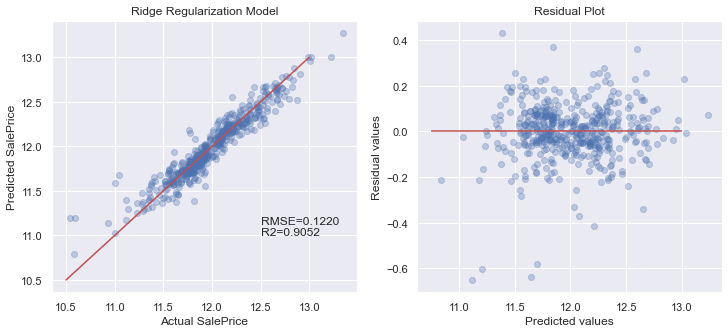

In [159]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
ax.scatter(y_holdout, ridge_predicted, alpha=0.3)
ax.plot([10.5,13], [10.5,13], color='r')
plt.ylabel('Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.title('Ridge Regularization Model')
plt.annotate(text='RMSE={:0.4f}\nR2={:0.4f}'.format(rmse,ridge.score(X_holdout, y_holdout)), xy=(12.5,11))

ax = plt.subplot(1,2,2)
ax.scatter(predicted, (y_holdout - ridge_predicted), alpha=0.3)
ax.hlines(y=0, xmin=10.75, xmax=13, color = 'r')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.title('Residual Plot')
plt.show()

In [160]:
#coefficients using Ridge Regularization. As we can see none of the coefficients are zero(i.e., no feature selection)
ridge_coefs = pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending=False)
print(ridge_coefs)

OverallQual             0.053118
GrLivArea               0.037471
TotalSF                 0.037119
OverallCond             0.033799
YearBuilt               0.028707
1stFlrSF                0.026413
BsmtFinSF1              0.026058
TotalBsmtSF             0.024456
TotRmsAbvGrd            0.021654
2ndFlrSF                0.020020
GarageArea              0.019971
Neighborhood_NridgHt    0.019122
GarageCars              0.018308
LotArea                 0.017282
KitchenQual_enc         0.017069
Neighborhood_Crawfor    0.017014
Neighborhood_StoneBr    0.015694
Fireplaces              0.014424
TotalBaths              0.014083
LotFrontage             0.013167
BsmtQual_enc            0.012612
MasVnrArea              0.012188
ScreenPorch             0.011938
HeatingQC_enc           0.011905
HalfBath                0.011549
LotConfig_CulDSac       0.010461
ExterQual_enc           0.010202
OpenPorchSF             0.010068
YearRemodAdd            0.009921
FullBath                0.009416
GarageYrBl

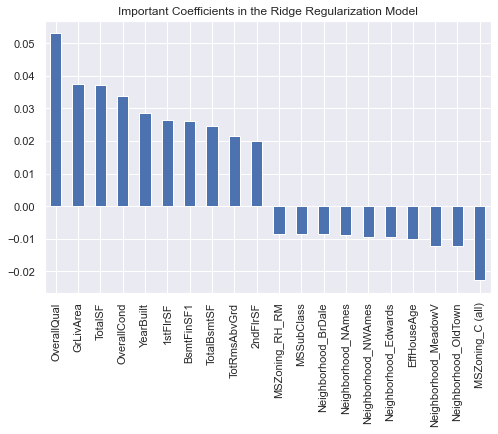

In [161]:
fig = plt.figure(figsize=(8,5))
pd.concat([ridge_coefs.head(10), ridge_coefs.tail(10)]).plot(kind='bar')
plt.title('Important Coefficients in the Ridge Regularization Model')
plt.show()

Ridge regression performed almost identical to the OLS Linear model. There was no substantial improvement in RMSE by the addition of *alpha*.

### Lasso Regression

LASSO is an alternative to Ridge Regression where the square of the coefficients is replaced by absolute value of coefficients. In contrast to ridge regression, lasso regression yields sparse feature vectors and therefore can be used to perform variable selection.

In [241]:
lassocv = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 
                  max_iter=50000)
lassocv.fit(X_train, y_train)
alpha = lassocv.alpha_
print('Best alpha: {}' .format(alpha))

lassocv = LassoCV(alphas=[0.6* alpha, 0.7* alpha, 0.8* alpha, 0.9* alpha, 1.1* alpha, 1.2* alpha, 1.3* alpha, 1.4* alpha],
                 max_iter = 50000)
lassocv.fit(X_train, y_train)
alpha = lassocv.alpha_
print('best alpha : {}' .format(alpha))

Best alpha: 0.003
best alpha : 0.0027


In [242]:
print('RMSE of train dataset is: {}' .format(rmse_cv_train(lassocv).mean()))
print('RMSE of holdout dataset is: {}' .format(rmse_cv_holdout(lassocv).mean()))

RMSE of train dataset is: 0.11972604054412306
RMSE of holdout dataset is: 0.12879885825662657


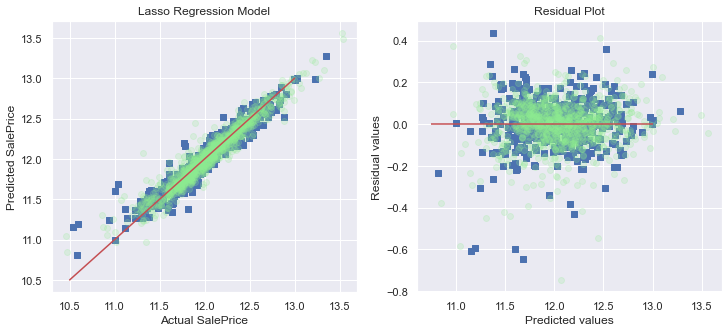

In [251]:
predict_train = lassocv.predict(X_train)
predict_holdout = lassocv.predict(X_holdout)

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
ax.scatter(y_holdout, predict_holdout, marker ='s')
ax.scatter(y_train, predict_train, alpha=0.2, color='lightgreen')
ax.plot([10.5,13], [10.5,13], color='r')
plt.ylabel('Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.title('Lasso Regression Model')
#plt.annotate(text='RMSE={:0.4f}\nR2={:0.4f}'.format(rmse,lassocv.score(X_holdout, y_holdout)), xy=(12.5,11))

ax = plt.subplot(1,2,2)
ax.scatter(predict_holdout, (y_holdout - predict_holdout), marker='s')
ax.scatter(predict_train, (y_train - predict_train), alpha=0.2, color='lightgreen')
ax.hlines(y=0, xmin=10.75, xmax=13, color = 'r')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.title('Residual Plot')
plt.show()

In [252]:
lasso_coefs = pd.Series(lassocv.coef_, index = X_train.columns).sort_values(ascending=False)
print(lasso_coefs)

TotalSF                 7.973976e-02
OverallQual             7.804313e-02
GrLivArea               6.976465e-02
YearBuilt               5.820802e-02
OverallCond             4.150848e-02
BsmtFinSF1              3.240324e-02
Neighborhood_Crawfor    2.028254e-02
GarageCars              1.953801e-02
GarageArea              1.883725e-02
LotArea                 1.878386e-02
GarageYrBlt             1.576588e-02
Neighborhood_NridgHt    1.574493e-02
Fireplaces              1.443789e-02
KitchenQual_enc         1.405044e-02
HeatingQC_enc           1.332886e-02
Neighborhood_StoneBr    1.299675e-02
TotRmsAbvGrd            1.116454e-02
ScreenPorch             1.078476e-02
LotFrontage             1.075747e-02
LotConfig_CulDSac       1.032053e-02
TotalBaths              9.335962e-03
BsmtQual_enc            7.772253e-03
EnclosedPorch           7.175721e-03
OpenPorchSF             7.125202e-03
MasVnrType_Stone        7.087525e-03
WoodDeckSF              7.043649e-03
Neighborhood_BrkSide    6.930586e-03
H

In [256]:
coeff_zero = sum(lasso_coefs == 0)
print('Lasso picked {} and deleted {} coeffecients.' .format((len(lasso_coefs) - coeff_zero), coeff_zero))

Lasso picked 68 and deleted 37 coeffecients.


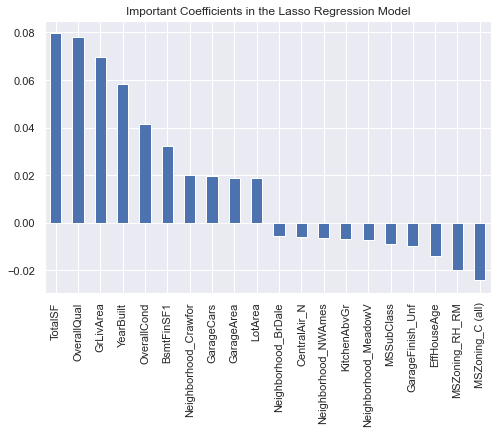

In [257]:
fig = plt.figure(figsize=(8,5))
pd.concat([lasso_coefs.head(10), lasso_coefs.tail(10)]).plot(kind='bar')
plt.title('Important Coefficients in the Lasso Regression Model')
plt.show()

In [175]:
X_test = test[features]

In [176]:
#check to make sure no null values in the features of interest
X_test.isnull().sum()

MSSubClass              0
LotFrontage             0
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt             0
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
ExterQual_enc           0
KitchenQual_enc         0
BsmtQual_enc

In [177]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
test_predicted = lassocv.predict(X_test)

In [178]:
test_predicted[:5]

array([11.67524797, 11.62657733, 12.08009394, 12.18515353, 12.22647832])

In [179]:
#convert log test_predicted values to the correct form using np.exp

final_prediction = np.exp(test_predicted)
final_prediction[:5]

array([117623.95207758, 112036.20176363, 176326.72392757, 195859.63501674,
       204123.05885082])

In [42]:
#create a submission file with ID and SalePrice values

submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = final_prediction
submission.head()

,Id,SalePrice
0,1461,117064.740370
1,1462,117408.584322
2,1463,178509.580037
3,1464,197188.682274
4,1465,202173.696483


In [43]:
#save the file
submission.to_csv('Data/submission_4.csv', index=False)

I submitted files using all three models on kaggle. Got the best result with submission_2 - Ridge Regularization.

### Next Step

Go back and improve feature Engineering.